In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [187]:
df = pd.read_csv('/Users/aion/school/crypto_data/lib/notebooks/btc_training.csv',index_col="Date",parse_dates=True)

In [188]:
# Double check the result
df.head()

,Price,Open,High,Low,Vol2,Change %
Date,,,,,,
2019-03-24,3994.7,4002.6,4005.7,3967.0,2040000,-0.20%
2019-03-23,4002.5,3990.4,4018.2,3980.8,2000000,0.30%
2019-03-22,3990.4,3982.2,4005.7,3971.8,2830000,0.21%
2019-03-21,3982.2,4041.2,4064.0,3923.8,3880000,-1.46%
2019-03-20,4041.2,4017.0,4050.0,3985.3,3180000,0.60%


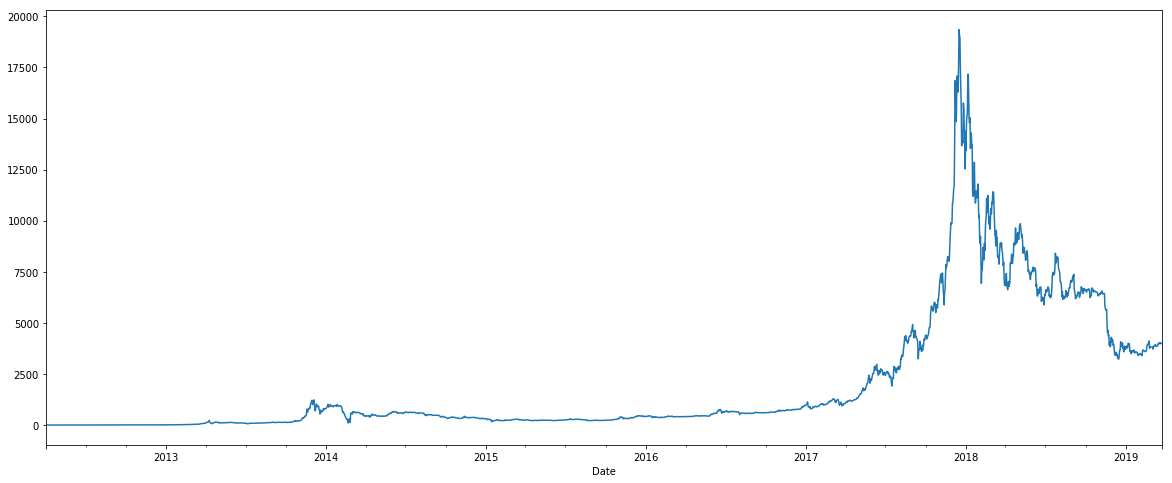

In [189]:
df['Price'].plot(figsize=(20,8))

In [190]:
df['SMA_20'] = df['Price'].rolling(9).mean()
df['SMA_40'] = df['Price'].rolling(20).mean()
df['SMA_80'] = df['Price'].rolling(50).mean()

Text(0.5, 1.0, 'Big Three Trading Strategy')

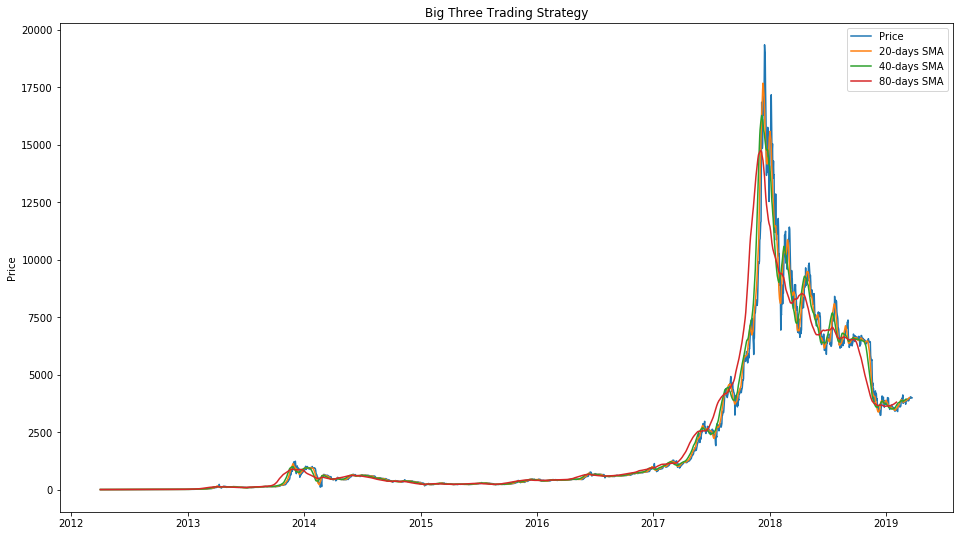

In [191]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df.index, df['Price'], label='Price')
ax.plot(df.index, df['SMA_20'], label = '20-days SMA')
ax.plot(df.index, df['SMA_40'], label = '40-days SMA')
ax.plot(df.index, df['SMA_80'], label = '80-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price')
ax.set_title('Big Three Trading Strategy')

In [150]:
# Plot diff windows
new_dates = df.loc[(df['Date'].dt.year >= 2017) & (df['Date'].dt.year < 2020)]
new_dates.head()

,Date,Price,Open,High,Low,Vol2,Change %,SMA_20,SMA_40,SMA_80
0,2019-03-24,3994.7,4002.6,4005.7,3967.0,2040000,-0.20%,NaN,NaN,NaN
1,2019-03-23,4002.5,3990.4,4018.2,3980.8,2000000,0.30%,NaN,NaN,NaN
2,2019-03-22,3990.4,3982.2,4005.7,3971.8,2830000,0.21%,NaN,NaN,NaN
3,2019-03-21,3982.2,4041.2,4064.0,3923.8,3880000,-1.46%,NaN,NaN,NaN
4,2019-03-20,4041.2,4017.0,4050.0,3985.3,3180000,0.60%,NaN,NaN,NaN


Text(0.5, 1.0, 'Big Three Trading Strategy')

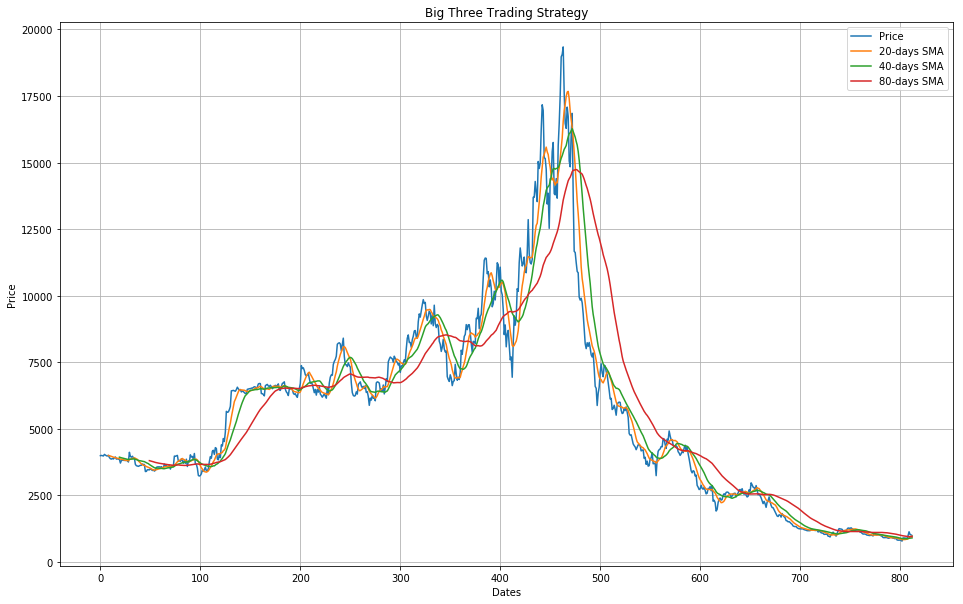

In [151]:
plt.figure(figsize=(16,10))
plt.plot(new_dates['Price'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Big Three Trading Strategy')

## LSTM for price prediction

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.25))

In [ ]:
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = False))
regressor.add(Dropout(0.25))

In [156]:
regressor.add(Dense(units= 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

NameError: name 'regressor' is not defined

## Training the RNN Model

In [ ]:
regressor.fit(X_train,Y_train, epochs = 100, batch_size = 32)